
# Project: Investigation of the IMDB-Movies Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we will be analyzing data about movies from the IMDB website (https://www.themoviedb.org/). We will be interested in finding trends related to the revenue of movies and what could affect it. Then we are going to take a look at the runtime of the movies and how it changed from year to year. 

Each row of the data set contains a movie entry and the columns include properties of that movie, like: homepage, id, original_title, overview, popularity, release_date...etc.

In this report I will explore the following questions:
1. What kinds of properties are associated with movies that have high revenues?
2. Which genres are most popular from year to year?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#the font sizes are being normalized for the plots
small = 13
meduim = 15
large = 17
plt.rc('font', size=small)          # the size of text
plt.rc('axes', titlesize=small)     # the fontsize of title 
plt.rc('axes', labelsize=meduim)    # x,y font size
plt.rc('xtick', labelsize=meduim)    # tick label font size
plt.rc('ytick', labelsize=meduim)    #  the tick labels font size
plt.rc('legend', fontsize=small)    # the font size of legend
plt.rc('figure', titlesize=large)   # the figure title fontsize
color = 'white' 
#you could change the color according to your prefernces as your color of your theme 


<a id='wrangling'></a>
## Data Wrangling

In [6]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [7]:
print(f'The number of rows of data is:  {df.shape[0]}  and the number of columns is {df.shape[1]} ')

The number of rows of data is:  10866  and the number of columns is 21 


In [7]:
#Here we can see the features (columns) contained in the data set.
print(' Columns fatures of data are ')
list(df.columns)

 Columns fatures of data are 


['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [8]:
print('information about null values in each column  \n')
df.info()

information about null values in each column  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  

The above cell shows infromation (index, name, number of nun-null values, data type and number of occurance of each data type) about each column of the data set

In [9]:
print('the statistics  in the data set.')
df.describe()

the statistics  in the data set.


id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

The above cell give us insight about some columns in the data set.

In [10]:
print('Are there missing data in columns ?')
if df.isnull().sum().any()!=0:
    print('Yes there is missing data')
else:
    print('No,there is not missing data')

Are there missing data in columns ?
Yes there is missing data


In [11]:
lst=df.columns
i=0
for i in range(len(lst)):
    i+=1
print(i)

21


In [12]:
print(f" {df.isnull().any().sum()} columns contain null of data as your total number of columns is {i} and  {df.isnull().sum().sum()} is total number of null data.")

 9 columns contain null of data as your total number of columns is 21 and  13434 is total number of null data.


In [13]:
print('Null values total in each column:')
df.isnull().sum()

Null values total in each column:


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
print('Does Dataset contain duplicated values ?')
if df.duplicated().sum().any():
    print('Yes, dataset contains duplicated values')
else:
    print('No, dataset does not contain duplicated values')

Does Dataset contain duplicated values ?
Yes, dataset contains duplicated values


In [15]:
print(f' {df.duplicated().any().sum()} is the total number of duplicates in the data set.')

 1 is the total number of duplicates in the data set.


In [16]:
print(f' {len(df.director.unique())} directors are included in the data set.')

 5068 directors are included in the data set.


In [17]:
print(f' {len(df.release_year.unique())} years of movies in dataset begining from {df.release_year.unique().min()} ending by {df.release_year.unique().max()}.\n')

 56 years of movies in dataset begining from 1960 ending by 2015.



In [18]:
print(f'the number of movies per each year of 56 years \n {df.release_year.value_counts(sort=False, ascending=False)}')

the number of movies per each year of 56 years 
 1960     32
1968     39
1976     47
1984    105
1992    133
2000    227
2008    496
1961     31
1969     31
1977     57
1985    109
1993    178
2001    242
2009    533
1962     32
1970     41
1978     65
1986    121
1994    184
2002    266
2010    490
1963     34
1971     55
1979     57
1987    125
1995    175
2003    281
2011    540
1964     42
1972     40
1980     78
1988    145
1996    204
2004    307
2012    588
1965     35
1973     55
1981     82
1989    137
1997    192
2005    364
2013    659
1966     46
1974     47
1982     81
1990    132
1998    210
2006    408
2014    700
1967     40
1975     44
1983     80
1991    133
1999    224
2007    438
2015    629
Name: release_year, dtype: int64


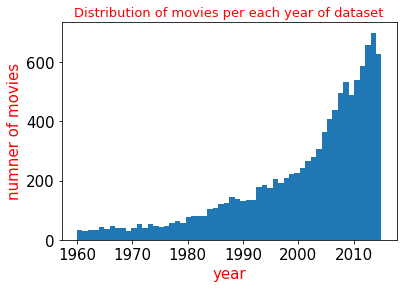

In [19]:
df_range = (df.release_year.unique().min(), df.release_year.unique().max())
plt.hist(df.release_year, bins = len(df.release_year.unique()), range= df_range);
plt.title('Distribution of movies per each year of dataset',color="red");
plt.xlabel('year', color="red")
plt.ylabel('numner of movies',color="red");
plt.xticks(color="black");
plt.yticks(color="black");

there is exponential relation between number of the years in y axis and year in x axis

In [20]:
#list of years to user it late
years = sorted(df.release_year.unique().tolist())
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


### Data Cleaning

First we will drop some unnecessary columns (imdb_id, homepage, tagline, keywords, overview, production_companies, release_date, budget_adj, revenue_adj), a total of 9 columns.

In [32]:
df

id  popularity     budget     revenue  \
0      135397   32.985763  150000000  1513528810   
1       76341   28.419936  150000000   378436354   
2      262500   13.112507  110000000   295238201   
3      140607   11.173104  200000000  2068178225   
4      168259    9.335014  190000000  1506249360   
...       ...         ...        ...         ...   
10861      21    0.080598          0           0   
10862   20379    0.065543          0           0   
10863   39768    0.065141          0           0   
10864   21449    0.064317          0           0   
10865   22293    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast            director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...     Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...       George Miller   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...    Robert Schwentke   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...         J.J. Abrams   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...           James Wan   
...                                                  ...                 ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...         Bruce Brown   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...  John Frankenheimer   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...         Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   

       runtime                                     genres  vote_count  \
0          124  Action|Adventure|Science Fiction|Thriller        5562   
1          120  Action|Adventure|Science Fiction|Thriller        6185   
2          119         Adventure|Science Fiction|Thriller        2480   
3          136   Action|Adventure|Science Fiction|Fantasy        5292   
4          137                      Action|Crime|Thriller        2947   
...        ...                                        ...         ...   
10861       95                                Documentary          11   
10862      176                     Action|Adventure|Drama          20   
10863       94                             Mystery|Comedy          11   
10864       80                              Action|Comedy          22   
10865       74                                     Horror          15   

       vote_average  release_year  
0               6.5          2015  
1               7.1          2015  
2               6.3          2015  
3               7.5          2015  
4               7.3          2015  
...             ...           ...  
10861           7.4          1966  
10862           5.7          1966  
10863           6.5          1966  
10864           5.4          1966  
10865           1.5          1966  

[10866 rows x 12 columns]

In [33]:
dropp = ['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']
df.drop(['revenue_adj'], axis = 1, inplace=True)

In [34]:
print(f' {df.shape[0]} is new number of rows and {df.shape[1]} is new number of columns.')

Now the data contains 10866 rows and 12 columns.


After dropping the unnecessary columns, we recheck for null values.

In [37]:
print('Does your data still contain null values')
if df.isnull().sum().any():
    print('Yes')
else:
    print('No')

Does your data still contain null values
Yes


In [39]:
print(f'{df.isnull().any().sum()} is number of columns still contain null data.')

3 is number of columns still contain null data.


In [41]:
print('null values number in each column of datset:')
df.isnull().sum()

null values number in each column of datset:


id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [42]:
print(f' {df.isnull().sum().sum()} is the total null values after dropping')

 143 is the total null values after dropping


Since the number of null valus is low (143) compared to the whole data set (10866), we can remove the null values.

In [43]:
df.dropna(inplace = True)

Final check of null values.

In [44]:
print('Are there any missing (null) data in the data set ?')
if df.isnull().sum().any():
    print('Yes')
else:
    print('No')

Are there any missing (null) data in the data set ?
No


In [49]:
#Recheck the data after dropping the null values
print(f' {df.shape[0]} is new number of rows and {len(df.columns)} is the new number of columns with no missing values.\n')

df.info()

 10731 is new number of rows and 12 is the new number of columns with no missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


Then we can remove the duplicated data and check if there are any duplicates exist.

In [46]:
df.drop_duplicates(inplace=True)

Recheck for duplicated values.

In [47]:
print('Does the dataset countain duplicates value ?')
if df.duplicated().sum().any():
    print('Yes')
else:
    print('No')

Does the dataset countain duplicates value ?
No


In [50]:
#chekking of the data after dropping the duplicated values
print(f'{df.shape[0]} is the new number of rows and {len(df.columns)} is the new number of columns with no duplicates and missing values.\n')

df.info()

10731 is the new number of rows and 12 is the new number of columns with no duplicates and missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


The above cell shows infromation (index, name, number of nun-null values, data type and number of occurance of each data type) about each column of the data set after cleaning.

A look at the dataset after cleaning.

In [40]:
df.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_count  \
0      124  Action|Adventure|Science Fiction|Thriller        5562   
1      120  Action|Adventure|Science Fiction|Thriller        6185   
2      119         Adventure|Science Fiction|Thriller        2480   
3      136   Action|Adventure|Science Fiction|Fantasy        5292   
4      137                      Action|Crime|Thriller        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [60]:
#Creating a duplicate data set to separate the genre column
df_genres = df.copy(deep=True)
df_genres.head()

id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  vote_count  \
0      124  Action|Adventure|Science Fiction|Thriller        5562   
1      120  Action|Adventure|Science Fiction|Thriller        6185   
2      119         Adventure|Science Fiction|Thriller        2480   
3      136   Action|Adventure|Science Fiction|Fantasy        5292   
4      137                      Action|Crime|Thriller        2947   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015  
2           6.3          2015  
3           7.5          2015  
4           7.3          2015

In [61]:
df_genres.set_index('id', inplace=True)

In [62]:
df_with_genres.head()

popularity     budget     revenue                original_title  \
id                                                                        
135397   32.985763  150000000  1513528810                Jurassic World   
76341    28.419936  150000000   378436354            Mad Max: Fury Road   
262500   13.112507  110000000   295238201                     Insurgent   
140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
168259    9.335014  190000000  1506249360                     Furious 7   

                                                     cast          director  \
id                                                                            
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
262500  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
140607  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
168259  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

        runtime                                     genres  vote_count  \
id                                                                       
135397      124  Action|Adventure|Science Fiction|Thriller        5562   
76341       120  Action|Adventure|Science Fiction|Thriller        6185   
262500      119         Adventure|Science Fiction|Thriller        2480   
140607      136   Action|Adventure|Science Fiction|Fantasy        5292   
168259      137                      Action|Crime|Thriller        2947   

        vote_average  release_year  
id                                  
135397           6.5          2015  
76341            7.1          2015  
262500           6.3          2015  
140607           7.5          2015  
168259           7.3          2015

In [66]:
#seperate column by Splitting the multiple genres entries .
dfgenres = df_genres['genres'].str.split("|", expand=True)

In [67]:
# cheking for successful separation 
dfgenres.head()

0                1                2         3     4
id                                                                 
135397     Action        Adventure  Science Fiction  Thriller  None
76341      Action        Adventure  Science Fiction  Thriller  None
262500  Adventure  Science Fiction         Thriller      None  None
140607     Action        Adventure  Science Fiction   Fantasy  None
168259     Action            Crime         Thriller      None  None

In [68]:
#  making a separated unique genres records Dataframes
dfgenres = dfgenres.stack()

dfgenres = pd.DataFrame(dfgenres)
dfgenres.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [69]:
#Renaming the genres column
dfgenres.rename(columns={0:'genres_adj'}, inplace=True)

In [70]:
dfgenres.head()

genres_adj
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [71]:
#Merge the data set (df) with the genres dataframe (genres_df)
df_genres = pd.merge(df_genres, dfgenres, on='id')

In [72]:
#We can now drop the original genres column
df.drop('genres',axis = 1, inplace=True)

A look at the new data set with genres splitted

In [73]:
df_genres.head()

popularity     budget     revenue      original_title  \
id                                                              
135397   32.985763  150000000  1513528810      Jurassic World   
135397   32.985763  150000000  1513528810      Jurassic World   
135397   32.985763  150000000  1513528810      Jurassic World   
135397   32.985763  150000000  1513528810      Jurassic World   
76341    28.419936  150000000   378436354  Mad Max: Fury Road   

                                                     cast         director  \
id                                                                           
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
135397  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
76341   Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

        runtime                                     genres  vote_count  \
id                                                                       
135397      124  Action|Adventure|Science Fiction|Thriller        5562   
135397      124  Action|Adventure|Science Fiction|Thriller        5562   
135397      124  Action|Adventure|Science Fiction|Thriller        5562   
135397      124  Action|Adventure|Science Fiction|Thriller        5562   
76341       120  Action|Adventure|Science Fiction|Thriller        6185   

        vote_average  release_year       genres_adj  
id                                                   
135397           6.5          2015           Action  
135397           6.5          2015        Adventure  
135397           6.5          2015  Science Fiction  
135397           6.5          2015         Thriller  
76341            7.1          2015           Action

In [74]:
print(f'{len(df_genres.genres_adj.unique())} is total number of genres in dataset')
print(f'and these are the genres: \n{df_genres.genres_adj.unique()}')

20 is total number of genres in dataset
and these are the genres: 
['Action' 'Adventure' 'Science Fiction' 'Thriller' 'Fantasy' 'Crime'
 'Western' 'Drama' 'Family' 'Animation' 'Comedy' 'Mystery' 'Romance' 'War'
 'History' 'Music' 'Horror' 'Documentary' 'TV Movie' 'Foreign']


In [75]:
#using value count in counting genres
df_genres.genres_adj.value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

The above cell shows us number of occurance of each genre in the data set.

In [76]:
#sorting the genres in a list for future use
genres = sorted(df_genres['genres_adj'].unique().tolist(), key=str.casefold)

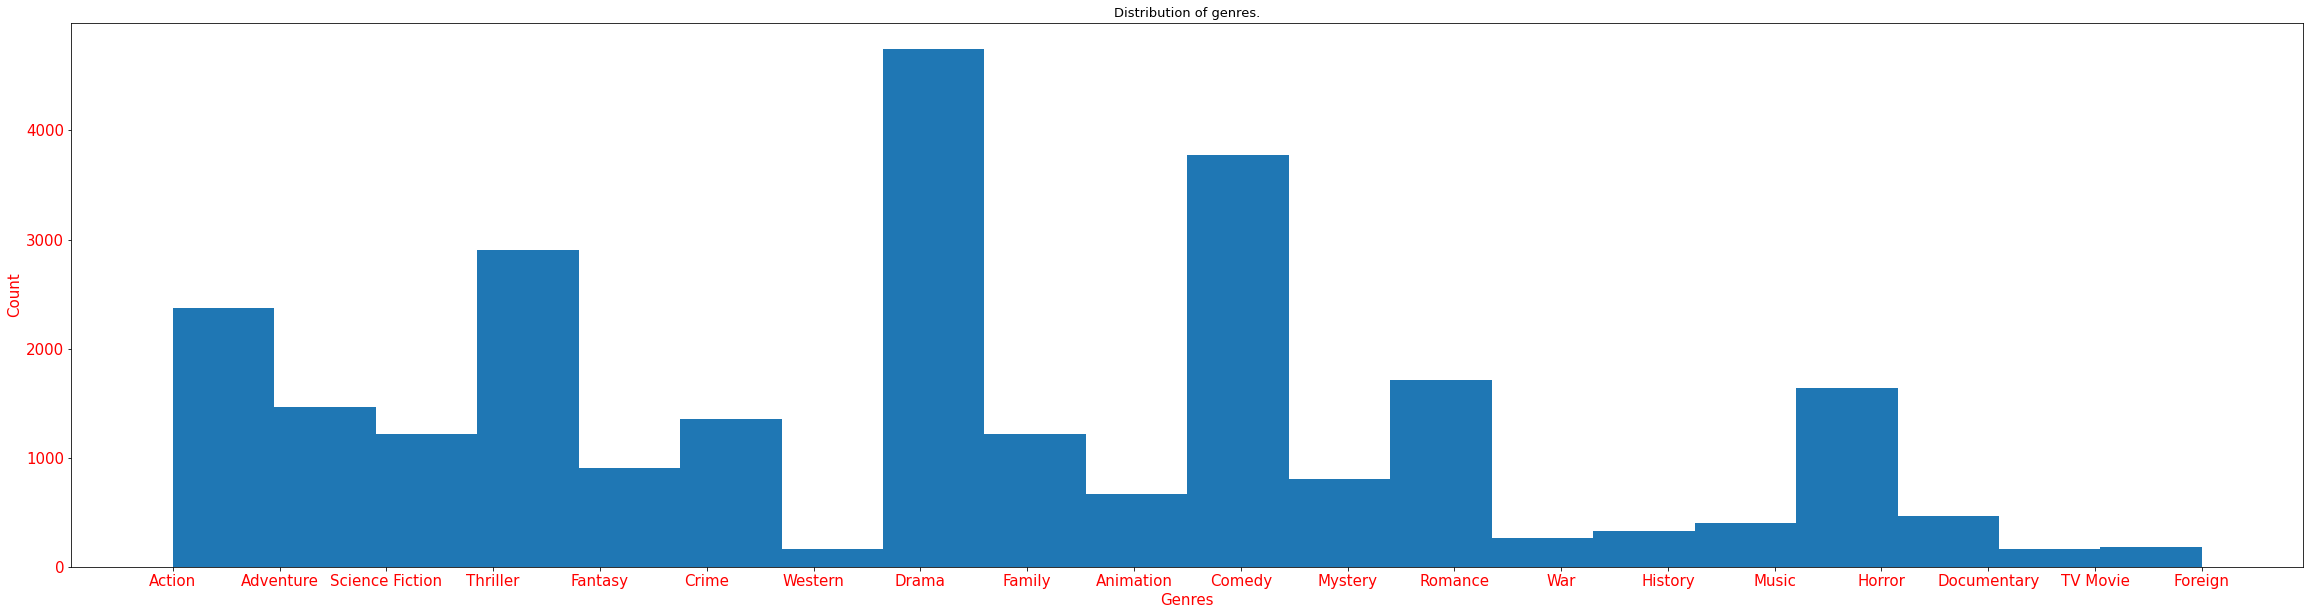

In [77]:
plt.figure(figsize=(40, 10))
plt.hist(df_genres.genres_adj , bins = len(df_genres.genres_adj.unique()));
plt.title('Distribution of genres.',color="Black");
plt.xlabel('Genres', color="red")
plt.ylabel('Count',color="red");
plt.xticks(color="red");
plt.yticks(color="red");

Here we can see the frequency of occurance of each genre in the data set, clearly the Drama genre is the highest in occurance.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

First we get the correlation of the dataset.

In [78]:
df['revenue'].describe()

count    1.073100e+04
mean     4.031989e+07
std      1.176524e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+07
max      2.781506e+09
Name: revenue, dtype: float64

Then we get the correlation of the dataset.

In [79]:
df.corr()

id  popularity    budget   revenue   runtime  vote_count  \
id            1.000000   -0.009464 -0.138935 -0.097424 -0.083996   -0.032767   
popularity   -0.009464    1.000000  0.544240  0.662843  0.138278    0.800619   
budget       -0.138935    0.544240  1.000000  0.734487  0.192168    0.632074   
revenue      -0.097424    0.662843  0.734487  1.000000  0.164276    0.790889   
runtime      -0.083996    0.138278  0.192168  0.164276  1.000000    0.164966   
vote_count   -0.032767    0.800619  0.632074  0.790889  0.164966    1.000000   
vote_average -0.071896    0.217906  0.087318  0.178477  0.177276    0.260554   
release_year  0.510385    0.093044  0.119004  0.059072 -0.119286    0.110317   

              vote_average  release_year  
id               -0.071896      0.510385  
popularity        0.217906      0.093044  
budget            0.087318      0.119004  
revenue           0.178477      0.059072  
runtime           0.177276     -0.119286  
vote_count        0.260554      0.110317  
vote_average      1.000000     -0.127746  
release_year     -0.127746      1.000000

From the correlation table we can determine that the popularity, budget and vote_count has the highest correlation with the revenue.

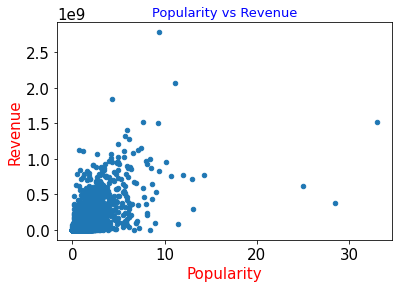

In [80]:
df.plot.scatter(x = 'popularity', y = 'revenue')
plt.title('Popularity vs Revenue',color="blue");
plt.xlabel('Popularity', color="red")
plt.ylabel('Revenue',color="red");
plt.xticks(color="black");
plt.yticks(color="black");

The above plot shows us the relation between the Popularity and Revenue columns. 

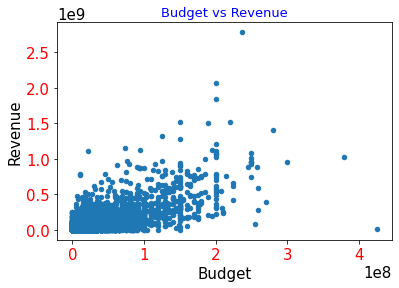

In [81]:
df.plot.scatter(x = 'budget', y = 'revenue')
plt.title('Budget vs Revenue',color="blue");
plt.xlabel('Budget', color="black")
plt.ylabel('Revenue',color="black");
plt.xticks(color="red");
plt.yticks(color="red");

The above plot shows us the relation between the Budget and Revenue columns. 

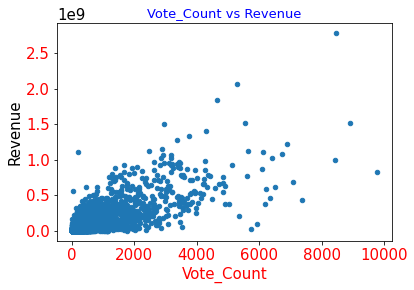

In [82]:
df.plot.scatter(x = 'vote_count', y = 'revenue')
plt.title('Vote_Count vs Revenue',color="blue");
plt.xlabel('Vote_Count', color="red")
plt.ylabel('Revenue',color="black");
plt.xticks(color="red");
plt.yticks(color="red");

The above plot shows us the relation between the Vote_Count and Revenue columns. 

Now we will assess the effect of genre type on the revenue.

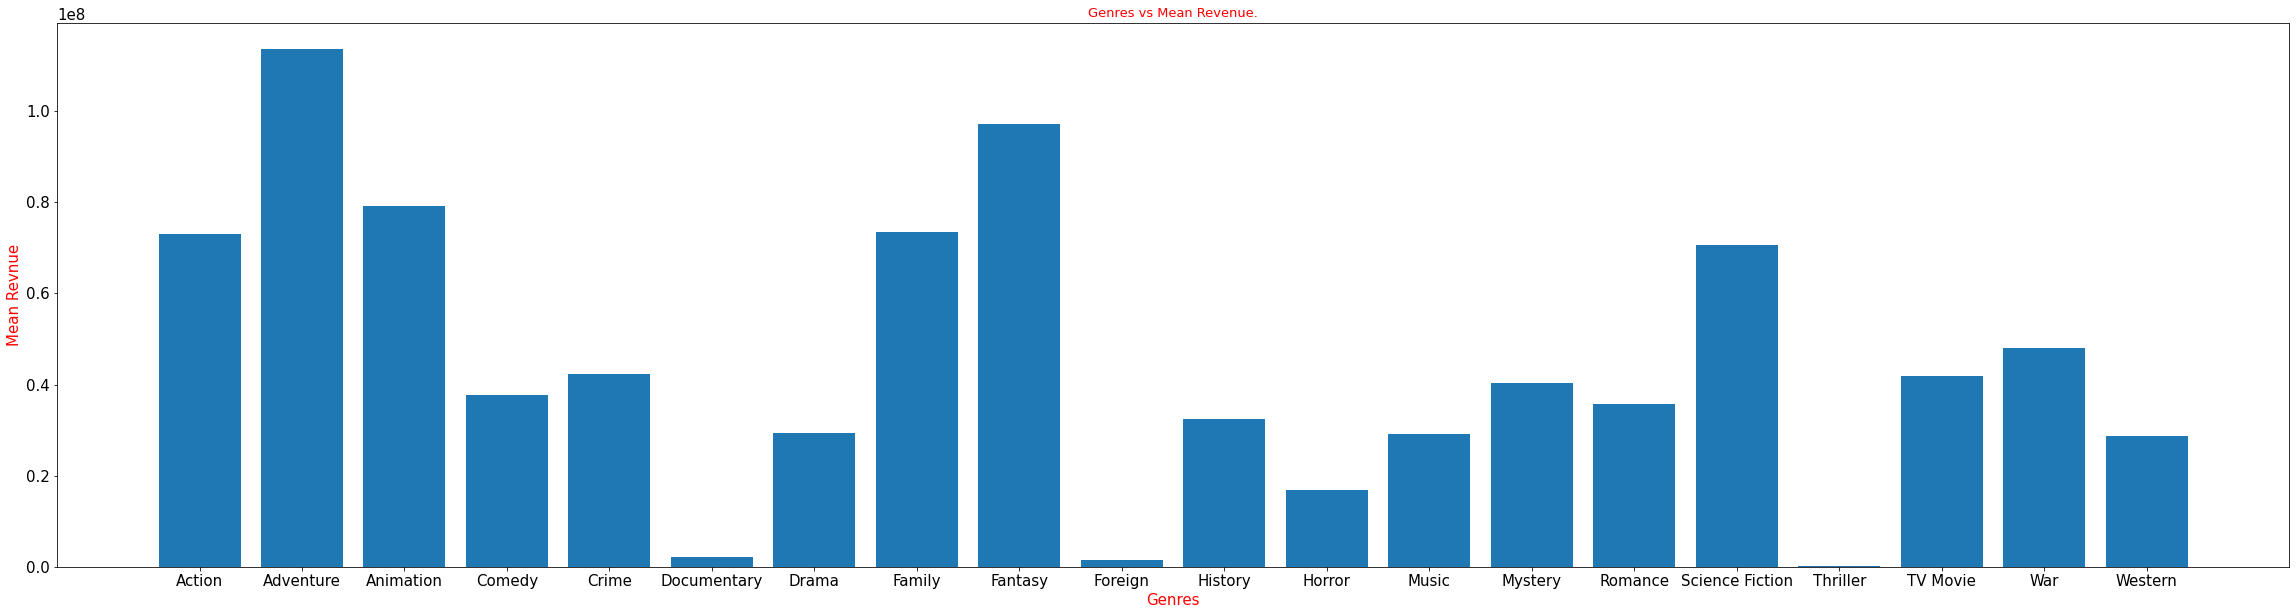

In [84]:
plt.figure(figsize=(40, 10))
plt.bar(genres, df_genres.groupby('genres_adj')['revenue'].mean())
plt.title('Genres vs Mean Revenue.',color="red");
plt.xlabel('Genres', color="red")
plt.ylabel('Mean Revnue',color="red");
plt.xticks(color="black");
plt.yticks(color="black");

From the above bas plot, we can see that the highest revenue comes from Adventure genre, while Thriller has the lowest revenue.

### Research Question 2  (Which genres are most popular from year to year?)

In [86]:
#creating fuction which takes a parameter of dataframe then converting it to dictionary
def df_to_dict(df):
    #create a copy of datset to edit on it freely
    dfyears = df.copy() 
    #sorting by release year
    dfyears.sort_values(by='release_year', inplace=True)
    dfyears.set_index(keys=['release_year'], drop=False,inplace=True)
    #removing unrequired columns
    dfyears.drop(['popularity','id', 'budget', 'revenue', 'original_title', 'cast', 'director','vote_count', 'vote_average', 'release_year'], axis = 1 , inplace=True)
    #making a dictionary
    dict_years = dict(tuple(dfyears.groupby('release_year')))
    return dict_years

In [88]:
#Using dict function
dfdict = df_to_dict(df)

In [91]:
#Checking the dictionary
dfdict

72               94
 1972              108
 1972              110
 1972              117
 1972              100
 1972              175
 1972              131
 1972               88
 1972               92
 1972               85
 1972               92
 1972               85
 1972               88
 1972              140
 1972              109
 1972              118
 1972              138,
 1973:               runtime
 release_year         
 1973               90
 1973               91
 1973               83
 1973               93
 1973               92
 1973               25
 1973              125
 1973               93
 1973              114
 1973              114
 1973              102
 1973              118
 1973               89
 1973              112
 1973               87
 1973               99
 1973               74
 1973              103
 1973              112
 1973               99
 1973               95
 1973              103
 1973              120
 1973              151
 1973  

In [92]:

#claculating the mean untime of each year 
mean_of_runtime = []
for r in range(1960,2016):
  mean_of_runtime.append(dfdict[r].mean())

In [93]:
#verifing the list
mean_of_runtime

[runtime    110.65625
 dtype: float64,
 runtime    119.419355
 dtype: float64,
 runtime    124.34375
 dtype: float64,
 runtime    111.323529
 dtype: float64,
 runtime    109.214286
 dtype: float64,
 runtime    118.171429
 dtype: float64,
 runtime    106.891304
 dtype: float64,
 runtime    108.921053
 dtype: float64,
 runtime    109.947368
 dtype: float64,
 runtime    110.066667
 dtype: float64,
 runtime    113.075
 dtype: float64,
 runtime    107.727273
 dtype: float64,
 runtime    101.95
 dtype: float64,
 runtime    103.527273
 dtype: float64,
 runtime    107.804348
 dtype: float64,
 runtime    107.363636
 dtype: float64,
 runtime    109.319149
 dtype: float64,
 runtime    108.160714
 dtype: float64,
 runtime    110.076923
 dtype: float64,
 runtime    112.017544
 dtype: float64,
 runtime    107.5
 dtype: float64,
 runtime    105.865854
 dtype: float64,
 runtime    103.925926
 dtype: float64,
 runtime    103.0
 dtype: float64,
 runtime    104.442308
 dtype: float64,
 runtime    110.203

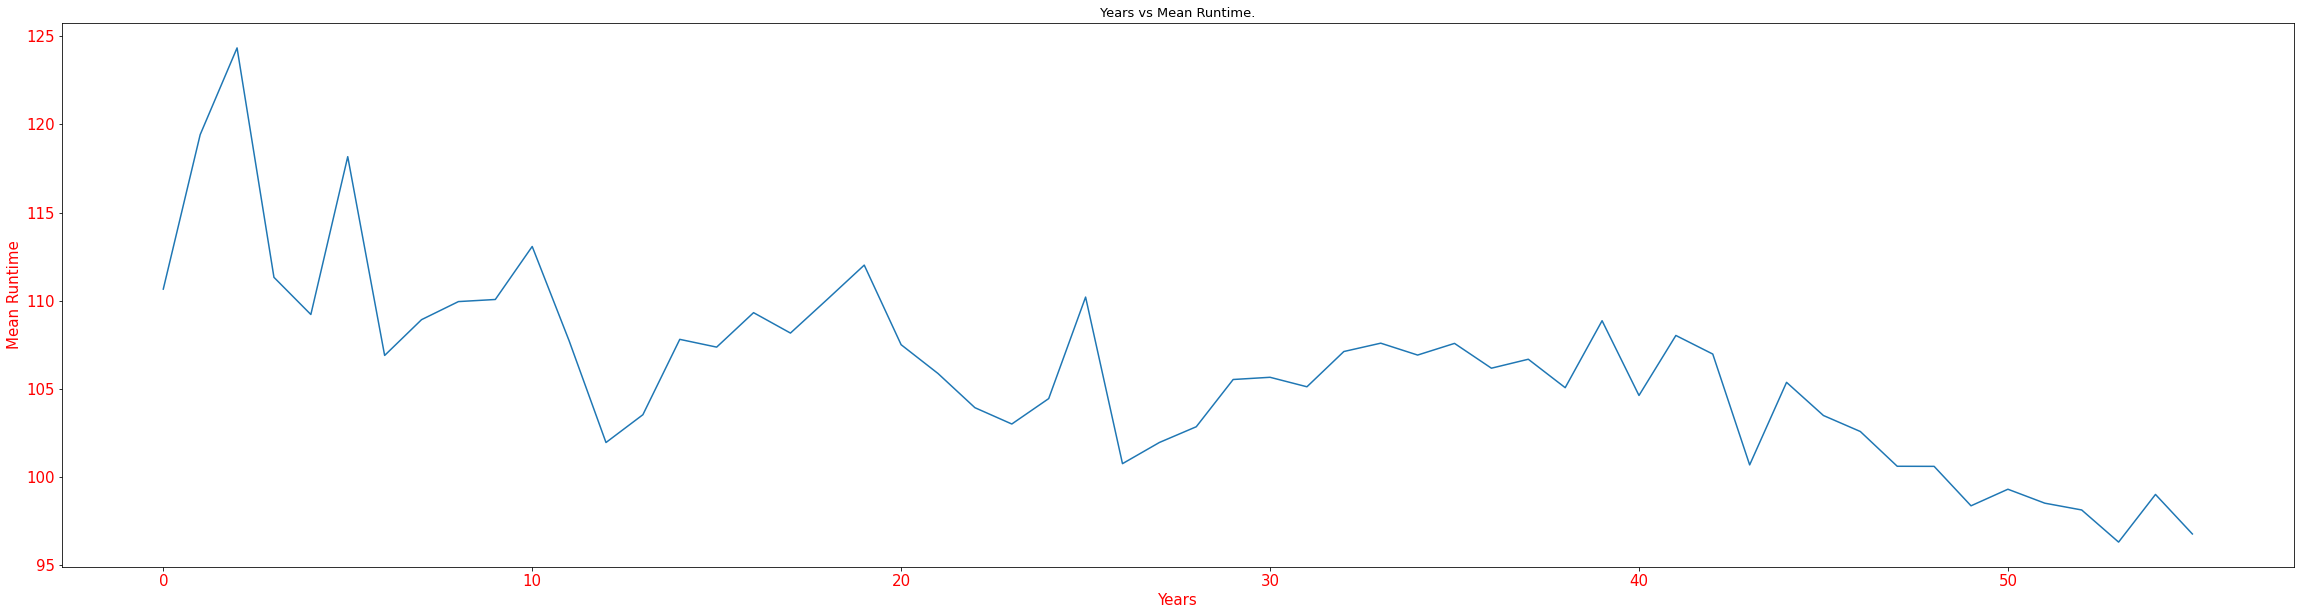

In [94]:
#Plotting list of runtime mean
plt.figure(figsize=(40, 10))
plt.plot(mean_of_runtime)
plt.title('Years vs Mean Runtime.',color="black");
plt.xlabel('Years', color="red")
plt.ylabel('Mean Runtime',color="red");
plt.xticks(ticks=None, color="red");
plt.yticks(color="red");

As we can see from this plot, the average runtime of the movies are decreasing year by year with slight fluctuations from one year to another.

<a id='conclusions'></a>
## Conclusions

Question 1: What kinds of properties are associated with movies that have high revenues?:
* Movies with higher budgets have shown a corresponding increase in the revenues.
* Highest revenue comes from Adventure genre, while Thriller has the lowest revenue.

Question 2: Which genres are most popular from year to year?:
* Average runtime of the movies are decreasing year by year with slight fluctuations from one year to another.

### Limitaions

* We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.

* There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
* Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed.